#<h5 align="center"><i></i></h5>
<font color="orange" face="Comic Sans MS, Arial"><h1 align="center">
El Descenso del Gradiente</h1></font>
<font color="black" face="Comic Sans MS, Arial">
 <h5 align="center"><font color = "black"><i></i></h5>
  <h5 align="center"><font color = ""><i>Gradient Descent</i></h5>
</font>


###<font color="teal" face="Comic Sans MS, Arial">Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets
import time

plt.rcParams.update({'text.usetex':True})
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

#<font color="orange" face="Comic Sans MS, Arial">El Gradiente

El gradiente de una función $f:\mathbb{R}^d\to\mathbb{R}$ es un vector que se define de la siguiente forma:
$$
\nabla f(\left.x_{1}, x_{2}, \ldots, x_{d}\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(\left.x_{1}, x_{2}, \ldots, x_{d}\right)\\
\dfrac{\partial f}{\partial x_2}(\left.x_{1}, x_{2}, \ldots, x_{d}\right) \\
\vdots \\
\dfrac{\partial f}{\partial x_d}(\left.x_{1}, x_{2}, \ldots, x_{d}\right)
\end{array}\right]
$$

Geométricamente, éste indica hacia qué dirección se maximiza la función (crece más).<br><br>
Por ejemplo: tómese $f(x,y)=\dfrac{x^2-xy+y^2-15000}{2}$, que se muestra a continuación:

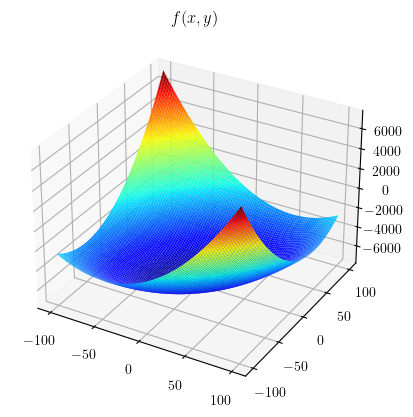

In [2]:
def f(x, y):
    """
    Función f(x, y) que calcula el valor de la función en un punto (x, y).

    Parámetros:
    x (float): Valor de la variable x.
    y (float): Valor de la variable y.

    Retorna:
    float: Valor de la función en el punto (x, y).
    """
    return (x**2 - x * y + y**2 - 15000) / 2

# Generar valores de x e y para crear una malla de puntos
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

# Crear una malla 2D de puntos X, Y
X, Y = np.meshgrid(x, y)

# Calcular los valores de Z usando la función f(x, y) en cada punto de la malla
Z = f(X, Y)

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# Crear una superficie tridimensional a partir de los datos de X, Y, Z
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')

# Establecer título del gráfico
plt.title('$f(x,y)$')

# Mostrar el gráfico
plt.show()

Tal que, su función gradiente es:
$$
\nabla f \left( x, y \right)
= \left[\begin{array}{c}
\dfrac{\partial f}{\partial x}\left( x, y \right)\\
\dfrac{\partial f}{\partial y}\left( x, y \right)
\end{array}\right]
= \left[\begin{array}{c}
\dfrac{\partial}{\partial x}\left(\dfrac{x^2-xy+y^2-15000}{2}\right)\\
\dfrac{\partial}{\partial y}\left(\dfrac{x^2-xy+y^2-15000}{2}\right)
\end{array}\right]
= \left[\begin{array}{c}
\dfrac{2x-y}{2}\\
\dfrac{-x+2y}{2}
\end{array}\right]
= \left[\begin{array}{c}
x-\dfrac{y}{2}\\
y-\dfrac{x}{2}
\end{array}\right]
$$

Entonces veamos que el gradiente de $(40,-10)$ es:
$$\nabla f(40,-10)
= \left[\begin{array}{c}
40-\dfrac{(-10)}{2}\\
-10-\dfrac{40}{2}
\end{array}\right]
=\left[\begin{array}{c}
40+5\\
-10-20
\end{array}\right]
=\left[\begin{array}{c}
45\\
-30
\end{array}\right]
$$

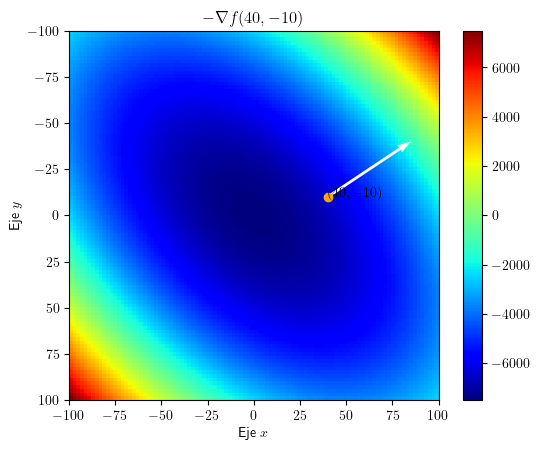

In [3]:
def grad_f(x, y):
    """
    Calcula el gradiente de la función f(x, y) en un punto (x, y).

    Parámetros:
    x (float): Valor de la variable x.
    y (float): Valor de la variable y.

    Retorna:
    tuple: Una tupla que contiene las componentes del vector gradiente (-fx, -fy).
    """
    fx = x - y / 2
    fy = y - x / 2
    return fx, fy

# Definir el punto donde se calculará el gradiente
v = (40, -10)

# Calcular el gradiente en el punto v
grad_v = grad_f(v[0], v[1])

# Crear el gráfico
plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
plt.colorbar()

# Dibujar el vector gradiente en el punto v
plt.quiver(v[0], v[1], grad_v[0], grad_v[1], scale_units='xy', angles='xy', scale=1, color='white')

# Marcar el punto v en el gráfico
plt.scatter(v[0], v[1], c='orange')
plt.annotate('$'+str(v)+'$', v)

# Configuración adicional del gráfico
plt.title(r'$-\nabla f'+str(v)+'$')
plt.xlabel('Eje $x$')
plt.ylabel('Eje $y$')

# Mostrar el gráfico
plt.show()

 Nótese que el vector gradiente apunta hacia donde la función crece, tiene valores más grandes. Intuitivamente, si se sigue la dirección contraria del gradiente, éste se dirige hacia una dirección decreciente de la función.

Como el gradiente es un vector de derivadas parciales, entonces hereda las propiedades de la linealidad, tal que:

$$-\nabla f(40,-10)
= -\left[\begin{array}{c}
45\\
-30
\end{array}\right]
= \left[\begin{array}{c}
-45\\
30
\end{array}\right]$$

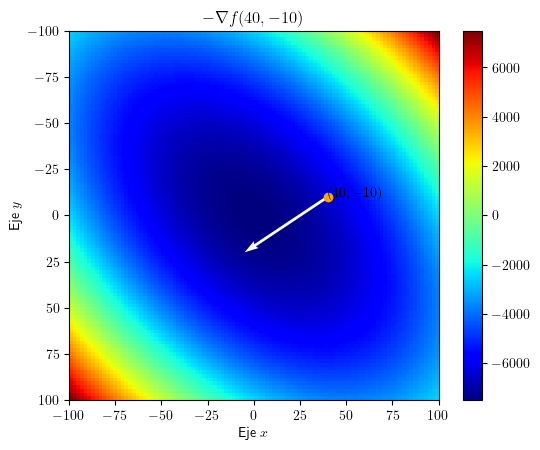

In [4]:
# Definir el punto donde se calculará el gradiente
v = (40, -10)

# Calcular el gradiente en el punto v
grad_v = grad_f(v[0], v[1])

# Crear el gráfico
plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
plt.colorbar()

# Dibujar el vector gradiente en el punto v
plt.quiver(v[0], v[1], -grad_v[0], -grad_v[1], scale_units='xy', angles='xy', scale=1, color='white')

# Marcar el punto v en el gráfico
plt.scatter(v[0], v[1], c='orange')
plt.annotate('$'+str(v)+'$', v)

# Configuración adicional del gráfico
plt.title(r'$-\nabla f'+str(v)+'$')
plt.xlabel('Eje $x$')
plt.ylabel('Eje $y$')

# Mostrar el gráfico
plt.show()

Nótese que ahora, siguiendo el sentido contrario al gradiente de $f$, éste apunta hacia una dirección decreciente.

#<font color="orange" face="Comic Sans MS, Arial">El  Descenso del Gradiente


Siguiendo la idea anterior, con el objetivo de buscar el valor mínimo de la función $f$, se puede iterar para $t\in\{0,1,...,T-1\}$, partiendo de un punto inicial $w_0$, y definiendo
$$w_{t+1}=w_t-\eta\nabla f(w_t),$$
donde $T\in\mathbb{N}$ es el número total de de pasos, y $\eta\in\mathbb{R}$ es un escalar que multiplica al gradiente, llamado el tamaño de paso o tasa de aprendizaje (*step size* o *learning rate* en inglés, respectivamente).

&nbsp;

---

<font face="Comic Sans MS, Arial"><font color="sky blue"> Descenso del Gradiente </font>

---

Parámetros: punto inicial $\omega_0\in\mathbb{R}^{d}$; tamaño de paso $\eta>0$; número de iteraciones $T\in\mathbb{N}$.

1. Para $t = 0,1,2,...,T-1$
2. &nbsp;&nbsp;&nbsp; $w_{t+1}=w_t-\eta\nabla f(w_t)$
3. Regresar $w_0,\ldots,w_T$

---

&nbsp;

Retomando el ejemplo anterior, con $f(x,y)=\dfrac{x^2-xy+y^2-15000}{2}$, iteremos el algoritmo de Descenso de Gradiente con $w_0=(40,-10), T=25$ y $\eta$ manipulable por la barra interactiva.

In [5]:
def descenso_gradiente_f(w0, T, eta):
    """
    Realiza el descenso de gradiente para la función f(x, y).

    Parámetros:
    w0 (tuple): Punto inicial (x, y) como una tupla.
    T (int): Número de iteraciones.
    eta (float): Tasa de aprendizaje.

    Retorna:
    list: Lista de puntos en el descenso de gradiente.
    """
    wt = np.array(w0)
    w = []
    w.append(wt)

    # Graficar la función y el punto inicial
    plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
    plt.colorbar()
    plt.scatter(w0[0], w0[1], c='orange',marker="o")
    plt.annotate(str(w0), w0)

    # Realizar el descenso de gradiente
    for t in range(T):
        grad_wt = np.array(grad_f(wt[0], wt[1]))
        wt = wt - eta * grad_wt
        w.append(wt)

    # Graficar el descenso de gradiente
    wx=np.array([t[0] for t in w])
    wy=np.array([t[1] for t in w])
    plt.quiver(wx[:-1],wy[:-1],wx[1:]-wx[:-1],wy[1:]-wy[:-1], scale_units='xy', angles='xy', scale=1, color='white', width=0.005)

    # Configuración adicional del gráfico
    plt.title('Descenso de Gradiente de $f$ \n $T='+str(T)+'$, $\eta='+str(eta)+'$ \n Punto final: $'+str(tuple(w[-1]))+'$')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.scatter(0,0,color="red",marker='X')
    plt.scatter(w[-1][0],w[-1][1],color="black",marker="^")
    plt.legend(['punto inicial','descenso del gradiente','punto minimo','punto final'],loc='best', bbox_to_anchor=(0.3, -0.65, 0.5, 0.5),facecolor='gray')
    plt.show()

    return w


# Crear un control deslizante para ajustar el tamaño del paso (tasa de aprendizaje)
eta_slider = widgets.FloatSlider(value=0.5, min=0.05, max=1.4, step=0.05, description='η')

# Definir la función de visualización interactiva
@interact(eta=eta_slider)
def visualize_normalized_gradient_descent(eta):
  #tomar el tiempo
  inicio = time.time()
  # Realizar el descenso de gradiente
  w = descenso_gradiente_f((40, -10), 25, eta)
  #fin de ejecución tiempo
  fin = time.time()
  tiempo = fin - inicio
  print("Tiempo de ejecución: ", tiempo)



interactive(children=(FloatSlider(value=0.5, description='η', max=1.4, min=0.05, step=0.05), Output()), _dom_c…

## Conclusiones

Elegir el tamaño de paso $\eta$ es de gran importancia, pues nótese que mientras se manipula su valor (con la barra interactiva) se ven diferentes comportamientos:
- Si $\eta < 0.7$, la trayectoria que sigue el descenso del gradiente es *suave*
- Si $\eta > 0.7$, la trayectoria empieza a *rebasar* el punto óptimo y empieza a *zigzagear*
- Si $\eta$ es muy pequeño, como $\eta=0.05$, dados 25 pasos, el descenso de gradiente no se acerca lo suficiente al mínimo
- Si $\eta$ es muy grande, como $\eta=1.35$, el algoritmo se aleja cada vez más en cada paso
- Con estos dos puntos anteriores, se puede ver que conforme $\eta$ va creciendo, el punto final se acerca más al punto mínimo, pero llega un momento a partir del cual se vuelve a alejar. Entonces existe un $\eta^*$ que dado un número de pasos $T$ es *el mejor*, el que se acerca más al óptimo, y alrededor de éste hay un intervalo *suficientemente bueno* que igual nos acerca bastante, aunque no sea igual que $\eta^*$, es *muy cercano*. En este ejemplo, se puede apreciar este comportamiento alrededor de $\eta=0.95$

Aunque esta función tiene un punto mínimo evidente y fácil de calcular analíticamente, existen funciones más complejas, cuyos mínimos no son tan obvios, incluso son imposibles de obtener de forma analítica; entonces aquí es donde entra este algoritmo computacional para aproximar el punto de forma numérica.